In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


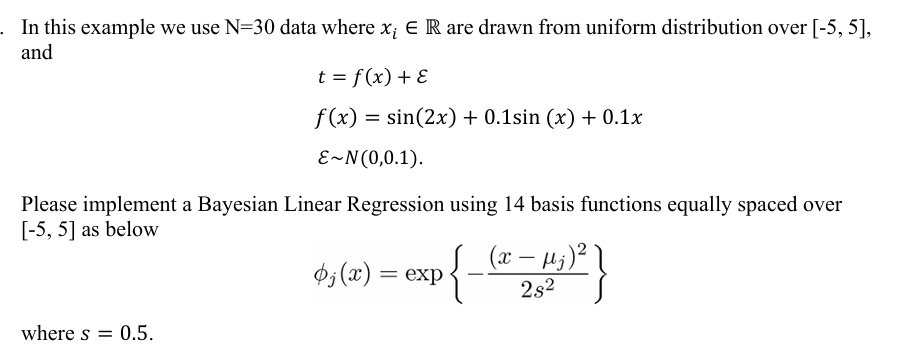

# Bayesian Regression introduction link:
https://zhuanlan.zhihu.com/p/130974579


You can take this as a brief example.

In [88]:

def get_posterior(a, b, XX, t):
    D = len(XX[0, :])
    SN = np.linalg.inv(a*np.identity(D) + b*np.dot(XX.T, XX))
    mN = b*np.linalg.multi_dot([SN, XX.T, t])
    return mN, SN

def get_basis_form(u, X, s):
    m = len(X)
    n = len(u)
    transform = np.empty([m, n])
    for i in range(m):
        transform[i] = np.array([np.exp(-((X[i] - u[j]) ** 2)) / (2 * (s ** 2)) for j in range(n)])
    return transform


# alpha = 1.0
# beta = 1.0

<ipython-input-114-71486526ba13>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = np.random.normal(rand_mean, rand_var, 1)


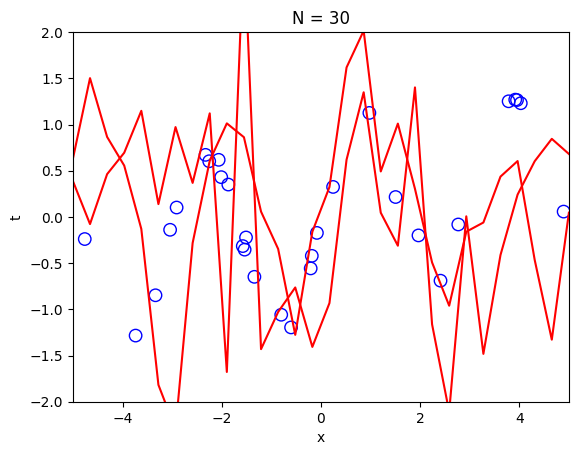

In [114]:
if __name__ == '__main__':
    # np.random.uniform(-5, 5, 30)
    X = np.random.uniform(-5, 5, 300)
    T = np.sin(2 * X) + 0.1 * np.sin(X) + 0.1 * X + np.random.normal(0, 0.1, len(X))
    total = len(X)

    # test_N = [10, 15, 30, 80]
    N = 30
    M = 14
    M_div2 = 7
    s = 0.5
    u1 = [float(j*-5)/M for j in range(M_div2)]
    u2 = [float(j*5)/M for j in range(M_div2)]
    combined_u = u1 + u2
    alpha = 1.0
    beta = 1.0

    x = np.linspace(-5, 5, 30)
    x_smooth = np.linspace(-5, 5, 30)
    y = np.empty(30)

    # f, axarr = plt.subplots(2, 2)

        # pos = pos_mapping(N)
    post_mean, post_var = get_posterior(alpha, beta, get_basis_form(combined_u, X[:N], s), T[:N])

    #generate random samples
    for l in range(2):
        for i in range(30):
            trans_x = np.squeeze(get_basis_form(combined_u, np.array([x[i]]), s))
            rand_mean = np.dot(post_mean.T, trans_x)
            rand_var = 1./beta + np.linalg.multi_dot([trans_x.T, post_var, trans_x])
            y[i] = np.random.normal(rand_mean, rand_var, 1)

        y_smooth = UnivariateSpline(x, y, s=1)(x_smooth)
        plt.plot(x_smooth, y_smooth, 'r-')

    # plt.plot(X, T, 'g-')
    plt.scatter(X[:N], T[:N], s=80, facecolors='none', edgecolors='b')
    plt.title('N = %d' % N)
    plt.xlim(-5.0, 5.0)
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('t')

    plt.show()

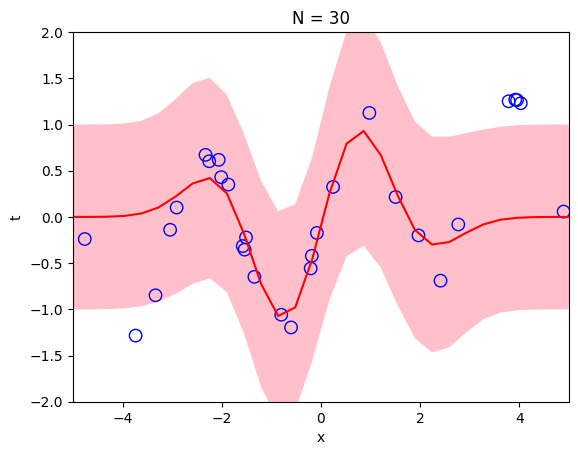

In [115]:
if __name__ == '__main__':
    # np.random.uniform(-5, 5, 30)
    # X = np.random.uniform(-5, 5, 300)
    # T = np.sin(2 * X) + 0.1 * np.sin(X) + 0.1 * X + np.random.normal(0, 0.1, len(X))
    # total = len(X)

    # # test_N = [10, 15, 30, 80]
    # N = 30
    # M = 14
    # M_div2 = 7
    # s = 0.5
    # u1 = [float(j*-5)/M for j in range(M_div2)]
    # u2 = [float(j*5)/M for j in range(M_div2)]
    # combined_u = u1 + u2
    # alpha = 1.0
    # beta = 1.0

    # x = np.linspace(-5, 5, 30)
    # x_smooth = np.linspace(-5, 5, 30)
    y = np.empty(30)
    y1 = np.empty(30)
    y2 = np.empty(30)
    # post_mean, post_var = get_posterior(alpha, beta, get_basis_form(combined_u, X[:N], s), T[:N])
    for i in range(30):
                trans_x = np.squeeze(get_basis_form(combined_u, np.array([x[i]]), s))
                y[i] = np.dot(post_mean.T, trans_x)
                rand_var = 1./beta + np.linalg.multi_dot([trans_x.T, post_var, trans_x])
                std = math.sqrt(rand_var)

                y1[i] = y[i] + std
                y2[i] = y[i] - std

    plt.plot(x, y, 'r-')
    # plt.plot(X, T, 'g-')
    plt.fill_between(x, y1, y2, facecolor='pink', edgecolor='none')
    plt.scatter(X[:N], T[:N], s=80, facecolors='none', edgecolors='b')
    plt.title('N = %d' % N)
    plt.xlim(-5.0, 5.0)
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('t')

    plt.show()



*   a = 20
*   b = 1.0



<ipython-input-117-febd6e9a058b>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = np.random.normal(rand_mean, rand_var, 1)


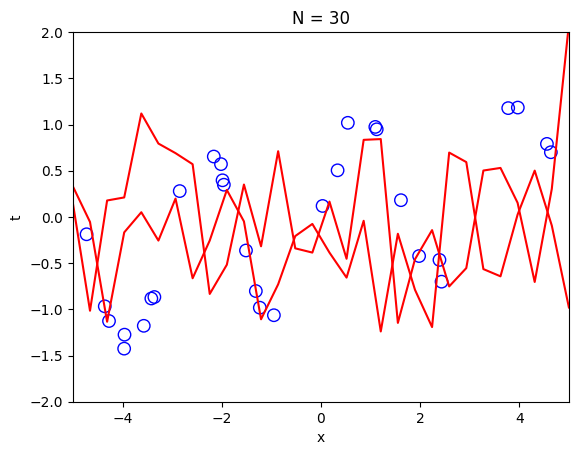

In [117]:
if __name__ == '__main__':
    # np.random.uniform(-5, 5, 30)
    X = np.random.uniform(-5, 5, 300)
    T = np.sin(2 * X) + 0.1 * np.sin(X) + 0.1 * X + np.random.normal(0, 0.1, len(X))
    total = len(X)

    # test_N = [10, 15, 30, 80]
    N = 30
    M = 14
    M_div2 = 7
    s = 0.5
    u1 = [float(j*-5)/M for j in range(M_div2)]
    u2 = [float(j*5)/M for j in range(M_div2)]
    combined_u = u1 + u2
    alpha = 20.0
    beta = 1.0

    x = np.linspace(-5, 5, 30)
    x_smooth = np.linspace(-5, 5, 30)
    y = np.empty(30)

    # f, axarr = plt.subplots(2, 2)

        # pos = pos_mapping(N)
    post_mean, post_var = get_posterior(alpha, beta, get_basis_form(combined_u, X[:N], s), T[:N])

    #generate random samples
    for l in range(2):
        for i in range(30):
            trans_x = np.squeeze(get_basis_form(combined_u, np.array([x[i]]), s))
            rand_mean = np.dot(post_mean.T, trans_x)
            rand_var = 1./beta + np.linalg.multi_dot([trans_x.T, post_var, trans_x])
            y[i] = np.random.normal(rand_mean, rand_var, 1)

        y_smooth = UnivariateSpline(x, y, s=1)(x_smooth)
        plt.plot(x_smooth, y_smooth, 'r-')

    # plt.plot(X, T, 'g-')
    plt.scatter(X[:N], T[:N], s=80, facecolors='none', edgecolors='b')
    plt.title('N = %d' % N)
    plt.xlim(-5.0, 5.0)
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('t')

    plt.show()

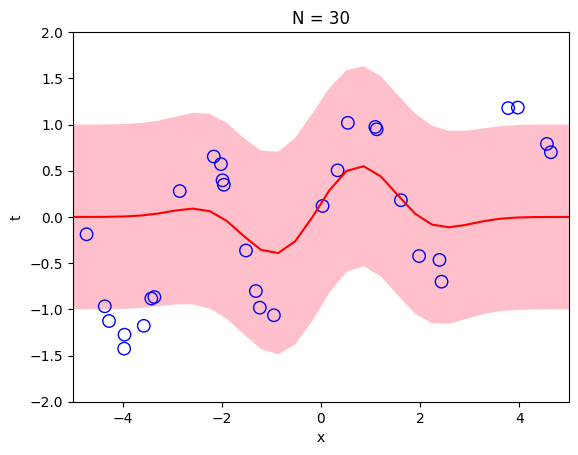

In [118]:
if __name__ == '__main__':

    y = np.empty(30)
    y1 = np.empty(30)
    y2 = np.empty(30)

    for i in range(30):
                trans_x = np.squeeze(get_basis_form(combined_u, np.array([x[i]]), s))
                y[i] = np.dot(post_mean.T, trans_x)
                rand_var = 1./beta + np.linalg.multi_dot([trans_x.T, post_var, trans_x])
                std = math.sqrt(rand_var)

                y1[i] = y[i] + std
                y2[i] = y[i] - std

    plt.plot(x, y, 'r-')
    # plt.plot(X, T, 'g-')
    plt.fill_between(x, y1, y2, facecolor='pink', edgecolor='none')
    plt.scatter(X[:N], T[:N], s=80, facecolors='none', edgecolors='b')
    plt.title('N = %d' % N)
    plt.xlim(-5.0, 5.0)
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('t')

    plt.show()